# Tugas Besar IF2220 Probabilitas dan Statistika
Disusun oleh:
1. Rafiki Prawhira Harianto (13522065)
2. Indraswara Galih Jayanegara (13522119)

## Soal 1: Descriptive Statistics
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

Poin yang perlu diperhatikan: 
mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness, dan kurtosis. 

In [187]:
import pandas as pd

pd.set_option('display.expand_frame_repr', False)

data = pd.read_csv('weather.csv')

# Hilangkan row dengan value NA (Dilakukan dalam penanganan outliers)
# data = data.dropna()

numerik = data.select_dtypes(include="number")
string = data.select_dtypes(include="object")

def describeNumerik(df : pd.DataFrame):
    d = pd.concat([df.describe(), df.agg(['skew', 'kurt'])])
    d.loc['var'] = df.var().tolist()
    d.loc["range"] = d.loc['max'] - d.loc['min']
    d.loc["IQR"] = d.loc['75%'] - d.loc['25%']
    d.loc["mode"] = df.mode().loc[0]
    return d

def describeString(df : pd.DataFrame):
    d = df.describe().loc[['count', 'unique']]
    return d


# Print descriptive statistics
print("Descriptive Statistics:") 
print(describeNumerik(numerik))
print("\nDescriptive Statistics String:") 
print(describeString(string)) #Tidak ada: proporsi
print("\nProporsi String: ") 
print(string.Weather_Type.value_counts(normalize=True))
print(string.Wind_Direction.value_counts(normalize=True))



Descriptive Statistics:
          Unnamed: 0  Temperature     Humidity  Precipitation   Wind_Speed  Cloud_Coverage     Pressure     UV_Index  Air_Quality   Visibility
count    2000.000000  2000.000000  2000.000000    2000.000000  2000.000000     2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean      999.500000    24.940225    70.110113       9.922872    14.929117       49.856025  1000.691301     5.464730    65.757886    15.091752
std       577.494589     3.003306     9.807775       5.031691     4.972098       10.134826    57.329860     2.588364     8.365777     4.985096
min         0.000000    15.441317    40.991391      -9.480835    -4.063694       13.241983   800.000000     1.002470    35.829769    -2.190009
25%       499.750000    22.919216    63.313635       6.695718    11.499557       43.127973   952.131330     3.316950    60.242220    11.773017
50%       999.500000    24.937000    69.871791       9.908852    14.890523       49.990347  1000.998439     5.326224  

## Soal 2: Outlier

Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

### Jawab: 
Ya, data ini memiliki outlier jika dicari menggunakan persamaan di atas dan dikonversi menjadi python untuk mengidentifikasi data outlier pada file weather.csv 
Untuk menangani outlier bisa dilakukan 
1. Menghilangkan data terkait, tetapi hal ini dapat mengakibatkan berkurangnya sample size dari data. 
2. Menimpa (me-replace) data terkait dengan data yang lebih masuk akal seperti mean, median, atau modus. 
3. Alternatif lain bisa dilakukan perhitungan matematika pada data seperti, logaritmik, akar kuadrat, atau standardisasi.
4. Biarkan data tersebut dengan menyesuaikan metode atau model analisis untuk mengolah dan menghitungnya.

#### Trivial: apa itu data outlier? 

Data outlier adalah nilai yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outlier dapat muncul karena berbagai alasan, termasuk kesalahan pengukuran, ketidakteraturan alamiah dalam fenomena yang diamati, atau kejadian langka yang tidak umum. Keberadaan outlier dapat mempengaruhi analisis statistik dan mengarah pada kesimpulan yang salah jika tidak diidentifikasi dan ditangani dengan benar. Cara mengetahui outlier menggunakan interquartile range (IQR). 
1. Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data. 
2. Hitung interquartile range (IQR) dengan persamaan : IQR = Q3 - Q1 
3. Tentukan batas atas dan batas bawah
    - Batas bawah: Lower Bound: Q1 - 1.5 x IQR 
    - Batas atas: Upper Bound: Q3 + 1.5 x IQR

In [188]:
import pandas as pd
import numpy as np

# Ambil dataFrame dari csv
data = pd.read_csv('weather.csv')

# Hilangkan row dengan value NA
data = data.dropna()

# Hilangkan row pertama yang berupa ID
del data[data.columns[0]]

# Dalam statistik string Weather_Type, hilangkan data yang muncul sangat jarang, yaitu Foggy dan Windy (0.0005)
col = 'Weather_Type' 
batas_atas = 10
data = data[data.groupby(col)[col].transform('count').ge(batas_atas)]

numeric_data = data.select_dtypes(include=['number'])

# Align data_cleaned dan numeric_data
data, numeric_data = data.align(numeric_data, axis=1)

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Cari outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Ambil data selain outliers
data = data[~outliers].reset_index(drop=True)

# Print data bersih
print("\nData Bersih:")
print(data)



Data Bersih:
      Air_Quality  Cloud_Coverage   Humidity  Precipitation     Pressure  Temperature  UV_Index  Visibility Weather_Type Wind_Direction  Wind_Speed
0       72.925943       64.494316  71.457157       7.509076  1093.875521    26.308998  5.902521   18.509121        Rainy           West   10.923478
1       64.649823       54.383351  69.672088       4.220767   965.291716    23.032419  9.047888   19.693711        Sunny           East   14.982321
2       60.461165       66.051994  86.053687       9.199037   905.728473    20.742818  1.423866   11.382937        Sunny           East    9.396453
3       73.977161       57.928168  74.641928      13.268281   980.591057    28.553441  5.918923   11.362726        Sunny           West   25.542511
4       75.520920       49.917458  66.544864      12.316017  1068.505929    23.739505  7.034857   15.523319        Sunny          North   20.331499
...           ...             ...        ...            ...          ...          ...       ...   

## Soal 3: Visualisasi Data

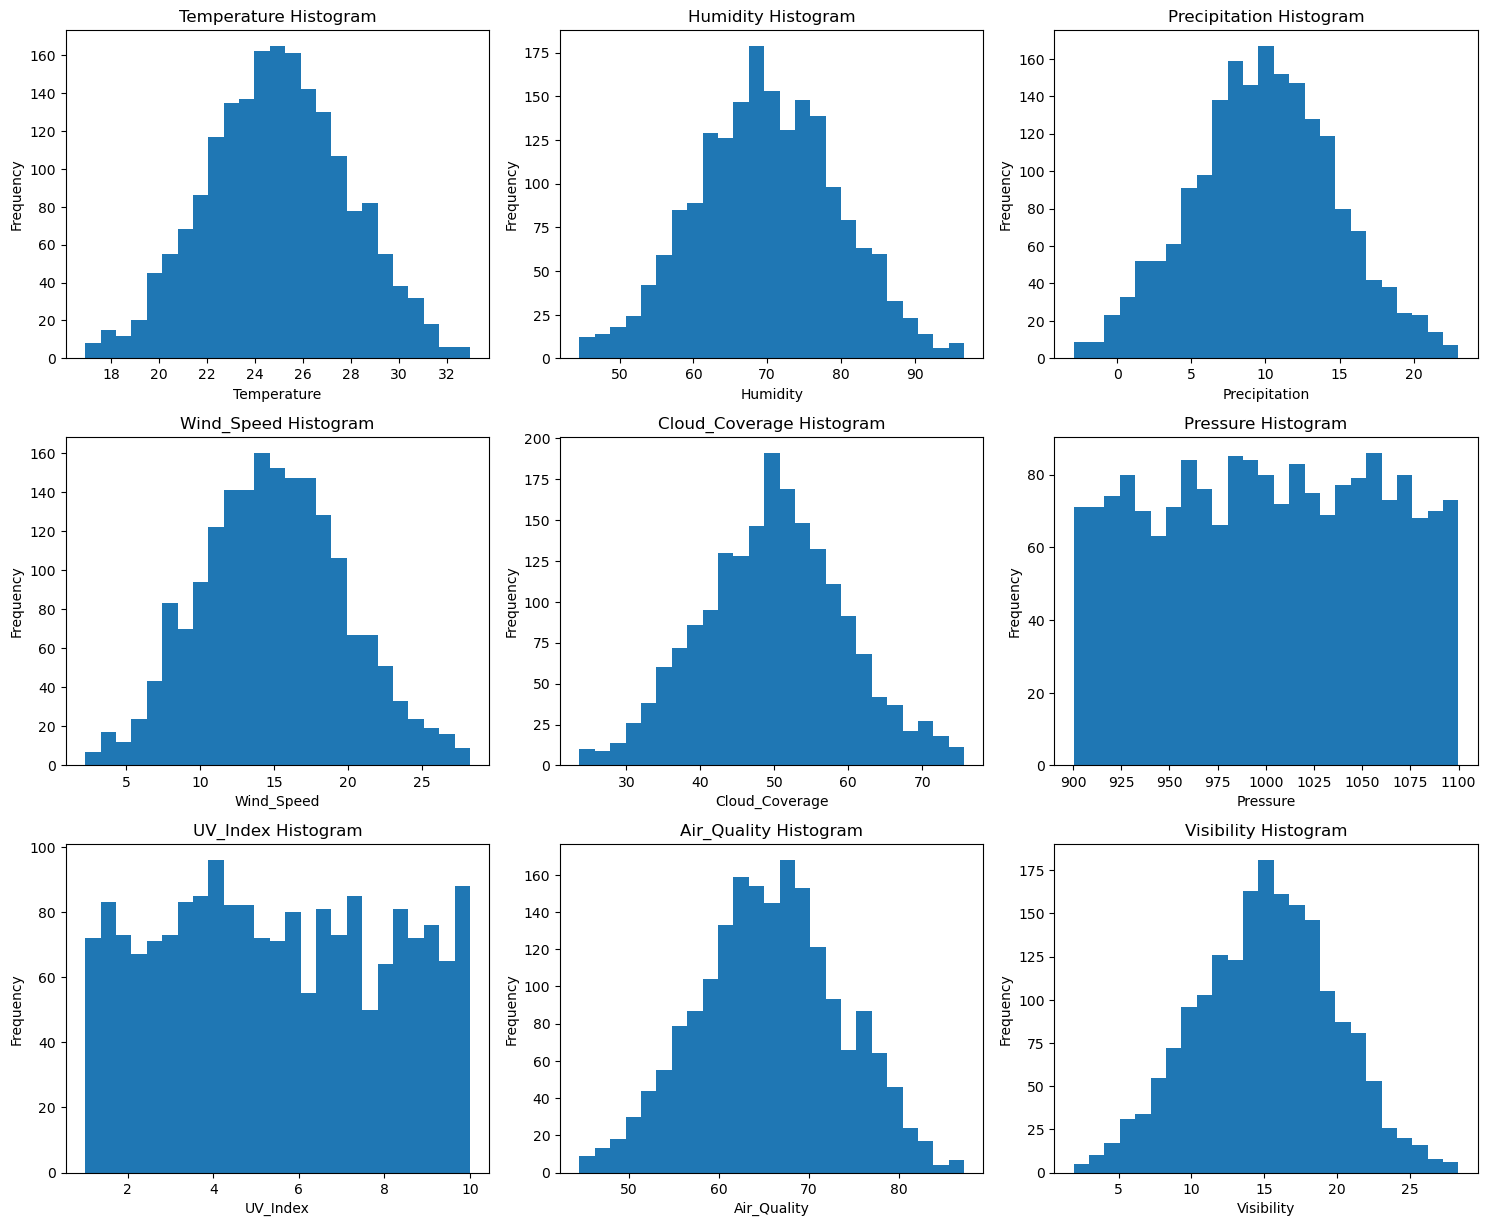

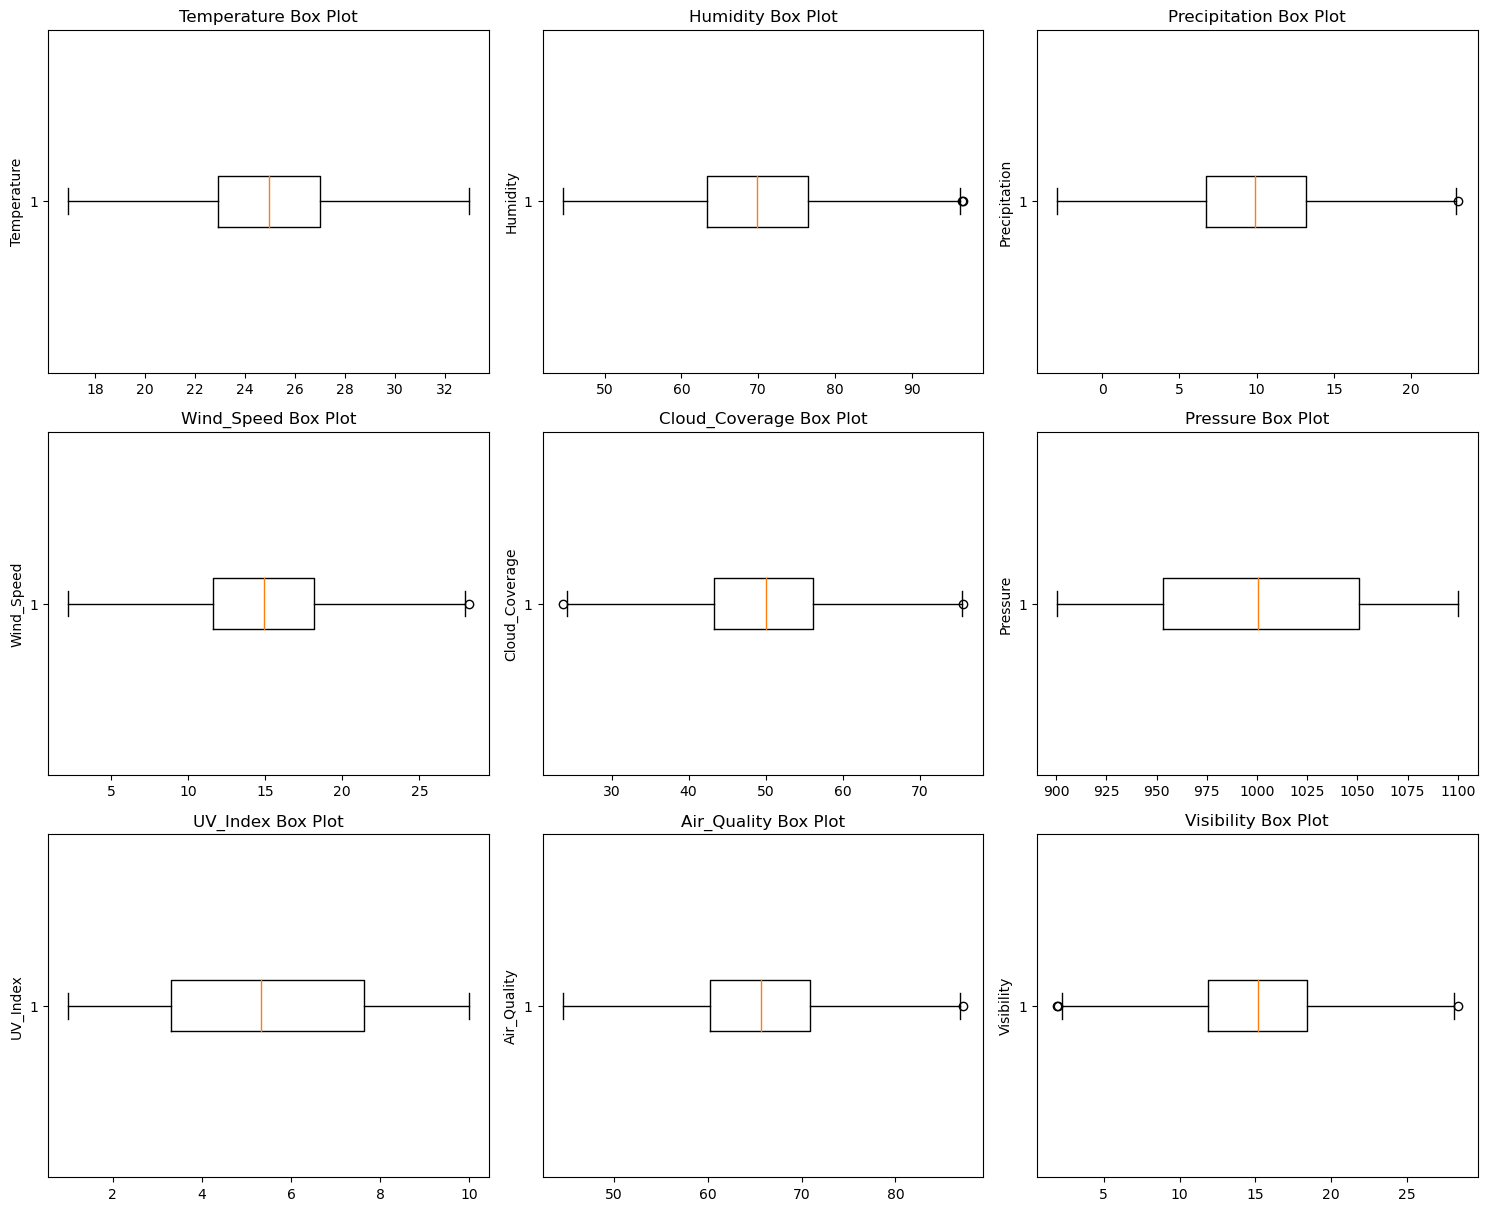

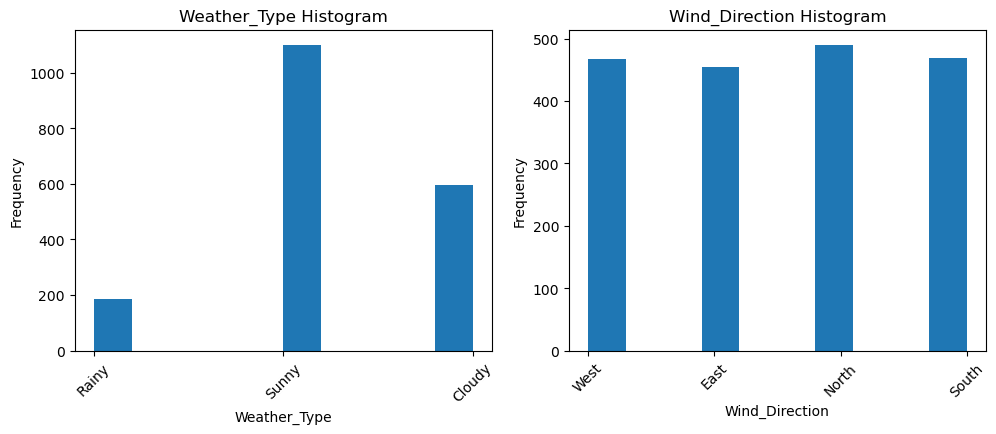

In [189]:

# ini untuk soal nomor 3 visualisasi plot distribusi (udah)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Plot histograms and box plots for numerical columns
numerical_columns = ['Temperature', 'Humidity', 'Precipitation', 'Wind_Speed', 'Cloud_Coverage', 'Pressure', 'UV_Index', 'Air_Quality', 'Visibility']
string_columns = ['Weather_Type', 'Wind_Direction']

# Grid
rows = 4
cols = 3

fig = plt.figure(figsize=(15, rows * 4))
gs = gridspec.GridSpec(rows, cols, figure=fig)

plot_idx = 0

for column in numerical_columns:
    # Histogram
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    ax.hist(data[column], bins=25)
    ax.set_title(f'{column} Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plot_idx += 1

fig.tight_layout()
plt.show()
fig = plt.figure(figsize=(15, rows * 4))
plot_idx = 0


for column in numerical_columns:
    # Box plot
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    ax.boxplot(data[column], vert=False)
    ax.set_title(f'{column} Box Plot')
    ax.set_ylabel(column)
    plot_idx += 1

fig.tight_layout()
plt.show()
fig = plt.figure(figsize=(15, rows * 4))
plot_idx = 0

# Histogram untuk string
for column in string_columns:
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    ax.hist(data[column])
    ax.set_title(f'{column} Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(data[column].unique())))
    ax.set_xticklabels(data[column].unique(), rotation=45)
    plot_idx += 1

fig.tight_layout()
plt.show()

Penjelasan kondisi setiap kolom berdasarkan graf Histogram/Boxplot:

Kolom Pressure dan UV_Index memiliki graf yang lebih tersebar rata dibanding graf lainnya, yang terlihat jelas pada histogram. 

Berdasarkan Boxplot, median dari Temperature sekitar 25, Humidity sekitar 70, Precipitation 10, Wind_Speed 15, Cloud_Coverage 50, Pressure 1000, UV_Index 5.5, Air_Quality 65, dan Visibility 15. 

Berdasarkan bar tertinggi Histogram, Temperature memiliki modus sekitar 25, Humidity 70, Precipitation 10, Wind_Speed 15, Cloud_Coverage 50, Pressure 1050, UV_Index 4, Air_Quality 68, dan Visibility 15. Sementara, untuk kedua histogram string Weather_Type dan Wind_Direction memiliki modus masing-masing Sunny dan North.

## Soal 4 : Distribusi Normal
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram: Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

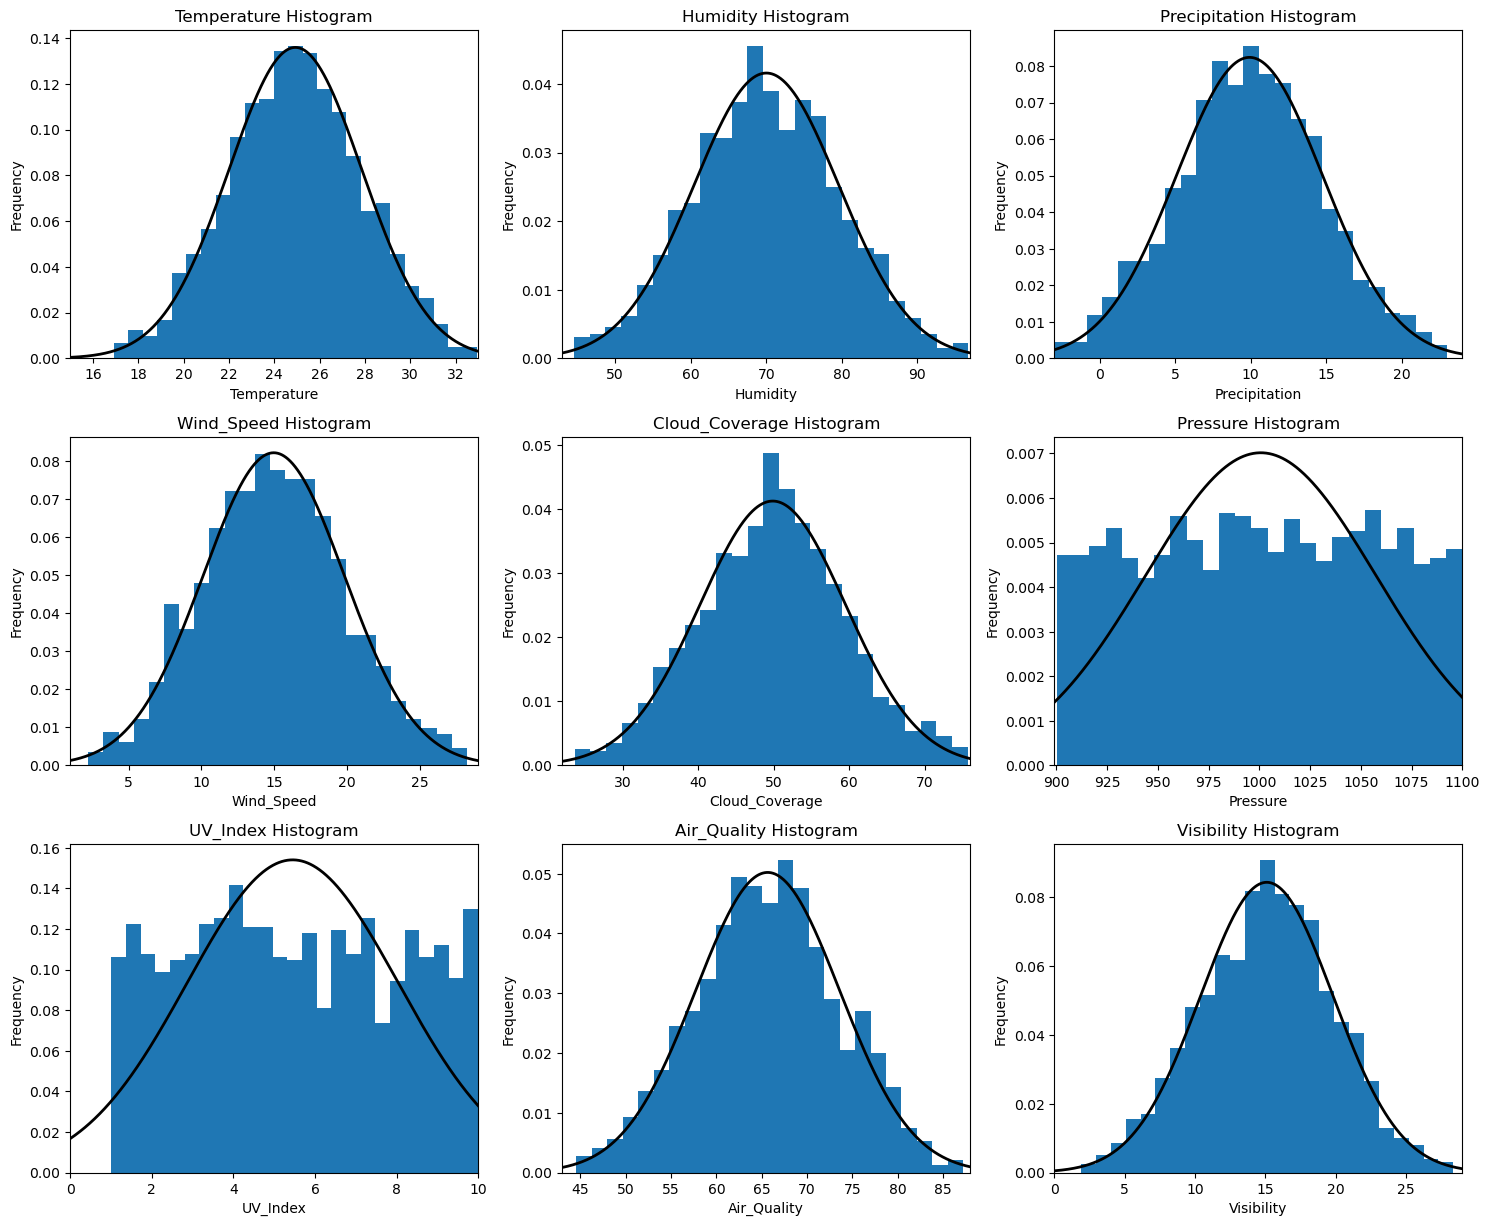

In [190]:
# Soal 4

import scipy

rows = 4
cols = 3

fig = plt.figure(figsize=(15, rows * 4))
gs = gridspec.GridSpec(rows, cols, figure=fig)
plot_idx = 0

for column in numerical_columns:
    # Histogram
    mu, std = scipy.stats.norm.fit(data[column])
    xmin = int(np.min(data[column]))-1
    xmax = int(np.max(data[column]))+1
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    ax.hist(data[column], bins=25, density=True)

    # Tambah garis visualisasi distribusi normal
    ax.set_xlim(xmin, xmax)
    x = np.linspace(xmin, xmax, 1000)
    pSukses = scipy.stats.norm.pdf(x, mu, std)
    ax.plot(x, pSukses, 'k', linewidth=2)

    ax.set_title(f'{column} Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plot_idx += 1  

fig.tight_layout()
plt.show()



### Jawab:
Dari hasil normality test yang dibuat, Humidity, Precipitation, Wind_Speed, Cloud_Coverage, Pressure, Air_Quality, dan Visibility berdistribusi normal dengan bentuk histogram Bell Curve.
Sementara untuk Temprature dan UV_Index negatively skewed.

## Soal 5: Hipotesis 1 sampel

### Enam Langkah Testing Hipotesis:
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.). 
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0. 
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. 
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan. 
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan 

### Jawab

In [191]:
nData = 1880 # Jumlah Data
vData = nData-1 # Derajat Kebebasan
alpha = 0.05 # Tingkat signifikansi alpha

#### a) Apakah rata2 humidity lebih dari 75?

In [192]:
# Rata-rata Humidity > 75?
humidity = data['Humidity']

def t_test_mu_biggerThan(s : pd.Series,  n_data : int, mu : int):
	
	# Langkah Hipotesis
	print("Hasil Test dengan langkah hipotesis")
	print(f"1. H0 : μ = {mu}")
	print(f"2. H1 : μ > {mu}")
	print("3. α = 0.05")

	tAlpha = scipy.stats.t.ppf(1 - alpha, vData) # Menghigung tAlpha
	tAlpha = round(tAlpha, 3) # Ambil 5 angka dibelakang koma
	print("4. Menggunakan uji statistik rata-rata one tailed t-test, dengan standar deviasi populasi tidak diketahui.")
	print(f"   Daerah kritis: t > {tAlpha}")

	tValue = (np.mean(s) - mu) / (np.std(s) / np.sqrt(n_data))
	tValue = round(tValue, 3)
	pValue = scipy.stats.t.sf(tValue, vData)
	pValue = round(pValue, 4) 
	print("5. Hasil uji statistik: ")
	print(f"   tValue : {tValue}")
	print(f"   pValue : {pValue}")

	print(f"6. Ambil keputusan: ")
	print("   pValue ... α")
	if (pValue < alpha):
		print(f"   {pValue} < {alpha}")
		print(f"   Tes menolak H0, sehingga rata-rata > {mu}.")
		print(f"   Nilai t seharusnya juga menunjukkan t masuk ke daerah kritis t > tα, yaitu {tValue} > {tAlpha}")
	else:
		print(f"   {pValue} >= {alpha}")
		print(f"   Tes gagal menolak H0, sehingga rata-rata = {mu}.")
		print(f"   Nilai t seharusnya juga menunjukkan t tidak masuk ke daerah kritis t > tα,")
		print(f"   yaitu {tValue} > {tAlpha} tidak berlaku.")


t_test_mu_biggerThan(humidity, nData, 75)

print("\nPerbandingan Menggunakan Library Referensi: ")
tstat, pvalue = scipy.stats.mstats.ttest_1samp(humidity, popmean=75, alternative='greater') 
print(f"   tValue : {tstat}")
print(f"   pValue : {pvalue}")

Hasil Test dengan langkah hipotesis
1. H0 : μ = 75
2. H1 : μ > 75
3. α = 0.05
4. Menggunakan uji statistik rata-rata one tailed t-test, dengan standar deviasi populasi tidak diketahui.
   Daerah kritis: t > 1.646
5. Hasil uji statistik: 
   tValue : -22.53
   pValue : 1.0
6. Ambil keputusan: 
   pValue ... α
   1.0 >= 0.05
   Tes gagal menolak H0, sehingga rata-rata = 75.
   Nilai t seharusnya juga menunjukkan t tidak masuk ke daerah kritis t > tα,
   yaitu -22.53 > 1.646 tidak berlaku.

Perbandingan Menggunakan Library Referensi: 
   tValue : -22.523551106105277
   pValue : 1.0



#### b) Apakah rata2 UV_INDEX tidak sama dengan 3?


In [193]:
# Rata-rata UV_INDEX != 3?
uv_index = data['UV_Index']

def t_test_mu_twoTailed(s : pd.Series,  n_data : int, mu : int):
	
	# Langkah Hipotesis
	print("Hasil Test dengan langkah hipotesis")
	print(f"1. H0 : μ = {mu}")
	print(f"2. H1 : μ != {mu}")
	print("3. α = 0.05")

	tAlpha = scipy.stats.t.ppf(1 - (alpha/2), vData) # Menghigung tAlpha
	tAlpha = round(tAlpha, 3) # Ambil 3 angka dibelakang koma
	print("4. Menggunakan uji statistik rata-rata two tailed t-test, dengan standar deviasi populasi tidak diketahui.")
	print(f"   Daerah kritis: t < {-tAlpha} ATAU t > {tAlpha} ")

	tValue = (np.mean(s) - mu) / (np.std(s) / np.sqrt(n_data))
	tValue = round(tValue, 3)
	pValue = scipy.stats.t.sf(tValue, vData)*2
	pValue = round(pValue, 4) 
	print("5. Hasil uji statistik: ")
	print(f"   tValue : {tValue}")
	print(f"   pValue : {pValue}")

	print(f"6. Ambil keputusan: ")
	print("   pValue ... α")
	if (pValue < alpha):
		print(f"   {pValue} < {alpha}")
		print(f"   Tes menolak H0, sehingga rata-rata != {mu}.")
		print(f"   Nilai t seharusnya juga menunjukkan t masuk ke daerah kritis t < -tα ATAU t > tα,")
		print(f"   yaitu {tValue} < {-tAlpha} ATAU {tValue} > {tAlpha} berlaku")
	else:
		print(f"   {pValue} >= {alpha}")
		print(f"   Tes gagal menolak H0, sehingga rata-rata = {mu}.")
		print(f"   Nilai t seharusnya juga menunjukkan t tidak masuk ke daerah kritis t < -tα ATAU t > tα,")
		print(f"   yaitu {tValue} < {-tAlpha} ATAU {tValue} > {tAlpha} tidak berlaku")

t_test_mu_twoTailed(uv_index, nData, 3)

print("\nPerbandingan Menggunakan Library Referensi: ")
tstat, pvalue = scipy.stats.ttest_1samp(uv_index, popmean=3, alternative='two-sided') 
print(f"   tValue : {tstat}")
print(f"   pValue : {pvalue}")

Hasil Test dengan langkah hipotesis
1. H0 : μ = 3
2. H1 : μ != 3
3. α = 0.05
4. Menggunakan uji statistik rata-rata two tailed t-test, dengan standar deviasi populasi tidak diketahui.
   Daerah kritis: t < -1.961 ATAU t > 1.961 
5. Hasil uji statistik: 
   tValue : 41.08
   pValue : 0.0
6. Ambil keputusan: 
   pValue ... α
   0.0 < 0.05
   Tes menolak H0, sehingga rata-rata != 3.
   Nilai t seharusnya juga menunjukkan t masuk ke daerah kritis t < -tα ATAU t > tα,
   yaitu 41.08 < -1.961 ATAU 41.08 > 1.961 berlaku

Perbandingan Menggunakan Library Referensi: 
   tValue : 41.06919871199544
   pValue : 1.1060629047625384e-263


#### c) Periksa apakah nilai rata-rata pressure berada dibawah angka 950?

In [194]:
# Rata-rata Pressure < 950?
pressure = data['Pressure']

def t_test_mu_lowerThan(s : pd.Series,  n_data : int, mu : int):
	
	# Langkah Hipotesis
	print("Hasil Test dengan langkah hipotesis")
	print(f"1. H0 : μ = {mu}")
	print(f"2. H1 : μ < {mu}")
	print("3. α = 0.05")

	tAlpha = scipy.stats.t.ppf(alpha, vData) # Menghigung tAlpha
	tAlpha = round(tAlpha, 3) # Ambil 3 angka dibelakang koma
	print("4. Menggunakan uji statistik rata-rata one tailed t-test, dengan standar deviasi populasi tidak diketahui.")
	print(f"   Daerah kritis: t < {tAlpha}")

	tValue = (np.mean(s) - mu) / (np.std(s) / np.sqrt(n_data))
	tValue = round(tValue, 3)
	pValue = scipy.stats.t.sf(-tValue, vData)
	pValue = round(pValue, 4) 
	print("5. Hasil uji statistik: ")
	print(f"   tValue : {tValue}")
	print(f"   pValue : {pValue}")

	print(f"6. Ambil keputusan: ")
	print("   pValue ... α")
	if (pValue < alpha):
		print(f"   {pValue} < {alpha}")
		print(f"   Tes menolak H0, sehingga rata-rata < {mu}.")
		print(f"   Nilai t seharusnya juga menunjukkan t masuk ke daerah kritis t < tα, yaitu {tValue} < {tAlpha}")
	else:
		print(f"   {pValue} >= {alpha}")
		print(f"   Tes gagal menolak H0, sehingga rata-rata = {mu}.")
		print(f"   Nilai t seharusnya juga menunjukkan t tidak masuk ke daerah kritis t < tα,")
		print(f"   yaitu {tValue} < {tAlpha} tidak berlaku.")


t_test_mu_lowerThan(pressure, nData, 950)

print("\nPerbandingan Menggunakan Library Referensi: ")
tstat, pvalue = scipy.stats.ttest_1samp(pressure, popmean=950, alternative='less') 
print(f"   tValue : {tstat}")
print(f"   pValue : {pvalue}")

Hasil Test dengan langkah hipotesis
1. H0 : μ = 950
2. H1 : μ < 950
3. α = 0.05
4. Menggunakan uji statistik rata-rata one tailed t-test, dengan standar deviasi populasi tidak diketahui.
   Daerah kritis: t < -1.646
5. Hasil uji statistik: 
   tValue : 38.652
   pValue : 1.0
6. Ambil keputusan: 
   pValue ... α
   1.0 >= 0.05
   Tes gagal menolak H0, sehingga rata-rata = 950.
   Nilai t seharusnya juga menunjukkan t tidak masuk ke daerah kritis t < tα,
   yaitu 38.652 < -1.646 tidak berlaku.

Perbandingan Menggunakan Library Referensi: 
   tValue : 38.64175013110981
   pValue : 1.0


#### d) Apakah proporsi nilai Cloud_Coverage yang kurang dari 60 tidak sama dengan 35% dari total dataset? 

In [195]:
# Rata-rata UV_INDEX != 3?
cloud_coverage = data['Cloud_Coverage']

def z_test_p_twoTailed_nilaiLessThan(s : pd.Series,  n_data : int, proportion : int, nilaiLessThan : int):
	
	# Langkah Hipotesis
	print("Hasil Test dengan langkah hipotesis")
	print(f"1. H0 : p = {proportion}")
	print(f"2. H1 : p != {proportion}")
	print("3. α = 0.05")

	zAlpha = scipy.stats.norm.ppf(1 - (alpha/2)) # Menghigung zAlpha two tailed
	zAlpha = round(zAlpha, 3) # Ambil 3 angka dibelakang koma
	print("4. Menggunakan uji proporsi two tailed z-test, dengan aproksimasi normal untuk binomial.")
	print(f"   Daerah kritis: t < {-zAlpha} ATAU t > {zAlpha} ")

	phat = ((s < nilaiLessThan).sum()) / nData
	zValue = (phat - proportion) / (np.sqrt( proportion*(1-proportion)/nData ))
	zValue = round(zValue, 3)
	pValue = scipy.stats.norm.sf(zValue)*2
	pValue = round(pValue, 4) 
	print("5. Hasil uji statistik: ")
	print(f"   zValue : {zValue}")
	print(f"   pValue : {pValue}")

	print(f"6. Ambil keputusan: ")
	print("   pValue ... α")
	if (pValue < alpha):
		print(f"   {pValue} < {alpha}")
		print(f"   Tes menolak H0, sehingga p != {proportion}.")
		print(f"   Nilai z seharusnya juga menunjukkan z masuk ke daerah kritis z < -zα ATAU z > zα,")
		print(f"   yaitu {zValue} < {-zAlpha} ATAU {zValue} > {zAlpha} berlaku")
	else:
		print(f"   {pValue} >= {alpha}")
		print(f"   Tes gagal menolak H0, sehingga p = {proportion}.")
		print(f"   Nilai z seharusnya juga menunjukkan z masuk ke daerah kritis z < -zα ATAU z > zα,")
		print(f"   yaitu {zValue} < {-zAlpha} ATAU {zValue} > {zAlpha} tidak berlaku")

z_test_p_twoTailed_nilaiLessThan(cloud_coverage, nData, 0.35, 60)

from statsmodels.stats.proportion import proportions_ztest #Untuk ztest proporsi

print("\nPerbandingan Menggunakan Library Referensi: ")
zstat, pvalue = proportions_ztest(count=(0.35 * nData), nobs=nData, value=(((cloud_coverage < 60).sum()) / nData), alternative='two-sided') 
print(f"   zValue : {abs(zstat)}") #Hasil ztat referensi negatif, tetapi tidak ngaruh karena test berupa two-tailed. Untuk kemudahan pembaca, hasil zstat referensi dimutlakan.
print(f"   pValue : {pvalue}")

Hasil Test dengan langkah hipotesis
1. H0 : p = 0.35
2. H1 : p != 0.35
3. α = 0.05
4. Menggunakan uji proporsi two tailed z-test, dengan aproksimasi normal untuk binomial.
   Daerah kritis: t < -1.96 ATAU t > 1.96 
5. Hasil uji statistik: 
   zValue : 46.226
   pValue : 0.0
6. Ambil keputusan: 
   pValue ... α
   0.0 < 0.05
   Tes menolak H0, sehingga p != 0.35.
   Nilai z seharusnya juga menunjukkan z masuk ke daerah kritis z < -zα ATAU z > zα,
   yaitu 46.226 < -1.96 ATAU 46.226 > 1.96 berlaku

Perbandingan Menggunakan Library Referensi: 
   zValue : 46.22620779005694
   pValue : 0.0


## Soal 6: Hipotesis 2 sampel
Perusahaan ingin membandingkan kondisi cuaca di dua area geografis yang berbeda. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang. 


### Jawab

In [196]:
# Soal 6: Hipotesis 2 Sampel
# Bagi jumlah data menjadi 2 daerah sama panjang
nData = nData // 2
vData = None #Derajat kebebasan untuk tes 2 sampel berbeda-beda

##### a) Apakah rata-rata Humidity di Area A sama dengan rata-rata Humidity di Area B?

In [197]:
humidity = data['Humidity']
areaA = humidity[:nData]
areaB = humidity[-nData:]

def t_test_twoSample_d0_twoTailed(sA : pd.Series,  sB : pd.Series, d0 : int):

	stdSA = np.std(sA)
	stdSB = np.std(sB)
	
	# Langkah Hipotesis
	print("Hasil Test dengan langkah hipotesis")
	print(f"1. H0 : μA - μB = {d0}")
	print(f"2. H1 : μA - μB != {d0}")
	print("3. α = 0.05")

	# Menghitung derajat kebebasan untuk t test 2 hipotesis, dengan standar deviasi sampel 1 != standar deviasi sampel 2
	vData = ((stdSA**2 / nData + stdSB**2 / nData)**2)/(((stdSA**2 / nData)**2) / (nData-1))+(((stdSB**2 / nData)**2) / (nData-1))

	tAlpha = scipy.stats.t.ppf(1 - (alpha/2), vData) # Menghigung tAlpha
	tAlpha = round(tAlpha, 3) # Ambil 3 angka dibelakang koma
	print("4. Menggunakan uji statistik rata-rata two tailed t-test, dengan standar deviasi populasi tidak diketahui.")
	print(f"   Daerah kritis: t < {-tAlpha} ATAU t > {tAlpha} ")

	tValue = ((np.mean(sA) - np.mean(sB)) - d0) / (np.sqrt(stdSA**2/nData + stdSB**2/nData))
	tValue = round(tValue, 3)
	pValue = scipy.stats.t.sf(abs(tValue), vData)*2
	pValue = round(pValue, 4) 
	print("5. Hasil uji statistik: ")
	print(f"   tValue : {tValue}")
	print(f"   pValue : {pValue}")

	print(f"6. Ambil keputusan: ")
	print("   pValue ... α")
	if (pValue < alpha):
		print(f"   {pValue} < {alpha}")
		print(f"   Tes menolak H0, sehingga μA - μB != {d0}.")
		print(f"   Nilai t seharusnya juga menunjukkan t masuk ke daerah kritis t < -tα ATAU t > tα,")
		print(f"   yaitu {tValue} < {-tAlpha} ATAU {tValue} > {tAlpha} berlaku")
	else:
		print(f"   {pValue} >= {alpha}")
		print(f"   Tes gagal menolak H0, sehingga μA - μB = {d0}.")
		print(f"   Nilai t seharusnya juga menunjukkan t tidak masuk ke daerah kritis t < -tα ATAU t > tα,")
		print(f"   yaitu {tValue} < {-tAlpha} ATAU {tValue} > {tAlpha} tidak berlaku")

t_test_twoSample_d0_twoTailed(areaA, areaB, 0)

print("\nPerbandingan Menggunakan Library Referensi: ")
tstat, pvalue = scipy.stats.ttest_ind(areaA, areaB, equal_var=False, alternative='two-sided') 
print(f"   tValue : {tstat}")
print(f"   pValue : {pvalue}")

Hasil Test dengan langkah hipotesis
1. H0 : μA - μB = 0
2. H1 : μA - μB != 0
3. α = 0.05
4. Menggunakan uji statistik rata-rata two tailed t-test, dengan standar deviasi populasi tidak diketahui.
   Daerah kritis: t < -1.961 ATAU t > 1.961 
5. Hasil uji statistik: 
   tValue : 0.24
   pValue : 0.8103
6. Ambil keputusan: 
   pValue ... α
   0.8103 >= 0.05
   Tes gagal menolak H0, sehingga μA - μB = 0.
   Nilai t seharusnya juga menunjukkan t tidak masuk ke daerah kritis t < -tα ATAU t > tα,
   yaitu 0.24 < -1.961 ATAU 0.24 > 1.961 tidak berlaku

Perbandingan Menggunakan Library Referensi: 
   tValue : 0.23975774928481688
   pValue : 0.8105442281760212


##### b) Apakah rata-rata Wind Speed di Area A lebih tinggi daripada di Area B sebesar 5 mm?

In [198]:
wind_speed = data['Wind_Speed']
areaA = wind_speed[:nData]
areaB = wind_speed[-nData:]

# Menggunakan two tail dari soal a) sebelumnya, 
# karena yang ditanya apakah areaA = areaB + 5
# dibandingkan dengan apakah areaA != areaB + 5
t_test_twoSample_d0_twoTailed(areaA, areaB, 5)

import statsmodels as sm

print("\nPerbandingan Menggunakan Library Referensi: ")
tstat, pvalue, df = sm.stats.weightstats.ttest_ind(areaA, areaB, usevar='unequal',  value=5, alternative='two-sided')
print(f"   tValue : {tstat}")
print(f"   pValue : {pvalue}")

Hasil Test dengan langkah hipotesis
1. H0 : μA - μB = 5
2. H1 : μA - μB != 5
3. α = 0.05
4. Menggunakan uji statistik rata-rata two tailed t-test, dengan standar deviasi populasi tidak diketahui.
   Daerah kritis: t < -1.961 ATAU t > 1.961 
5. Hasil uji statistik: 
   tValue : -24.091
   pValue : 0.0
6. Ambil keputusan: 
   pValue ... α
   0.0 < 0.05
   Tes menolak H0, sehingga μA - μB != 5.
   Nilai t seharusnya juga menunjukkan t masuk ke daerah kritis t < -tα ATAU t > tα,
   yaitu -24.091 < -1.961 ATAU -24.091 > 1.961 berlaku

Perbandingan Menggunakan Library Referensi: 
   tValue : -24.07781255051835
   pValue : 7.490353684452906e-112


##### c) Apakah variansi Air_Quality di Area A sama dengan di Area B?

In [199]:
air_quality = data['Air_Quality']
areaA = air_quality[:nData]
areaB = air_quality[-nData:]

def f_test_twoSample_var_twoTailed(sA : pd.Series,  sB : pd.Series):

	varSA = np.std(sA)**2
	varSB = np.std(sB)**2
	
	# Langkah Hipotesis
	print("Hasil Test dengan langkah hipotesis")
	print(f"1. H0 : varA = varB")
	print(f"2. H1 : varA != varB")
	print("3. α = 0.05")

	vData = nData - 1 # Derajat kebebasan untuk tes f-dist

	fAlpha = scipy.stats.f.ppf(1 - (alpha/2), vData, vData) # Menghigung fAlpha
	fAlpha = round(fAlpha, 3) # Ambil 3 angka dibelakang koma
	print("4. Menggunakan uji statistik variansi two tailed tes f-dist, dengan standar deviasi populasi tidak diketahui (hanya diketahui standar deviasi sampel).")
	print(f"   Daerah kritis: f < {-fAlpha} ATAU f > {fAlpha} ")

	fValue = varSA / varSB
	fValue = round(fValue, 3)
	pValue = scipy.stats.f.sf(fValue, vData, vData)*2
	pValue = round(pValue, 4) 
	print("5. Hasil uji statistik: ")
	print(f"   fValue : {fValue}")
	print(f"   pValue : {pValue}")

	print(f"6. Ambil keputusan: ")
	print("   pValue ... α")
	if (pValue < alpha):
		print(f"   {pValue} < {alpha}")
		print(f"   Tes menolak H0, sehingga varA != varB.")
		print(f"   Nilai f seharusnya juga menunjukkan f masuk ke daerah kritis f < -fα ATAU t > fα,")
		print(f"   yaitu {fValue} < {-fAlpha} ATAU {fValue} > {fAlpha} berlaku")
	else:
		print(f"   {pValue} >= {alpha}")
		print(f"   Tes gagal menolak H0, sehingga varA = varB.")
		print(f"   Nilai f seharusnya juga menunjukkan f tidak masuk ke daerah kritis f < -fα ATAU t > fα,")
		print(f"   yaitu {fValue} < {-fAlpha} ATAU {fValue} > {fAlpha} tidak berlaku")

f_test_twoSample_var_twoTailed(areaA, areaB)

# Tidak ditemukan library referensi untuk menentukan test kedua variansi menggunakan f_test secara langsung
# Sebagai ganti, dibandingkan dengan referensi kode eksternal dari:
# https://www.tutorialspoint.com/how-to-perform-an-f-test-in-python

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = nData-1
   dun = nData-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

print("\nPerbandingan Menggunakan Library Referensi: ")
fstat, pvalue = f_test(areaA, areaB)
print(f"   fValue : {fstat}")
print(f"   pValue : {pvalue}")



Hasil Test dengan langkah hipotesis
1. H0 : varA = varB
2. H1 : varA != varB
3. α = 0.05
4. Menggunakan uji statistik variansi two tailed tes f-dist, dengan standar deviasi populasi tidak diketahui (hanya diketahui standar deviasi sampel).
   Daerah kritis: f < -1.137 ATAU f > 1.137 
5. Hasil uji statistik: 
   fValue : 1.235
   pValue : 0.0012
6. Ambil keputusan: 
   pValue ... α
   0.0012 < 0.05
   Tes menolak H0, sehingga varA != varB.
   Nilai f seharusnya juga menunjukkan f masuk ke daerah kritis f < -fα ATAU t > fα,
   yaitu 1.235 < -1.137 ATAU 1.235 > 1.137 berlaku

Perbandingan Menggunakan Library Referensi: 
   fValue : 1.2348783102383238
   pValue : 0.0006220396717088184


##### d) Apakah proporsi nilai precipitation yang kurang dari 7 pada daerah A lebih besar daripada kuantitas proporsi di daerah B dengan nilai yang sama?

In [200]:
precipitation = data['Precipitation']
areaA = precipitation[:nData]
areaB = precipitation[-nData:]

def lessThanProportion_twoTailed_biggerThan(sA : pd.Series, sB : pd.Series, nilaiBanding):
	
	# Langkah Hipotesis
	print("Hasil Test dengan langkah hipotesis")
	print(f"1. H0 : p1 = p2")
	print(f"2. H1 : p1 > p2")
	print("3. α = 0.05")

	zAlpha = scipy.stats.norm.ppf(1 - alpha) # Menghigung tAlpha
	zAlpha = round(zAlpha, 3) # Ambil 3 angka dibelakang koma
	print("4. Menggunakan uji statistik proporsi one tailed z-test")
	print(f"   Daerah kritis: z > {zAlpha}")

	x1 = (sA < nilaiBanding).sum()
	x2 = (sB < nilaiBanding).sum()
	pHat1 = x1/nData
	pHat2 = x2/nData
	pSukses = (x1+x2)/(nData+nData)
	zValue = (pHat1-pHat2) / (np.sqrt(pSukses*(1-pSukses)*((1/nData)+(1/nData))))
	zValue = round(zValue, 3)
	pValue = scipy.stats.norm.sf(zValue)
	pValue = round(pValue, 4) 
	print("5. Hasil uji statistik: ")
	print(f"   zValue : {zValue}")
	print(f"   pValue : {pValue}")

	print(f"6. Ambil keputusan: ")
	print("   pValue ... α")
	if (pValue < alpha):
		print(f"   {pValue} < {alpha}")
		print(f"   Tes menolak H0, sehingga p1 > p2.")
		print(f"   Nilai z seharusnya juga menunjukkan z masuk ke daerah kritis z > zα, yaitu {zValue} > {zAlpha}")
	else:
		print(f"   {pValue} >= {alpha}")
		print(f"   Tes gagal menolak H0, sehingga p1 = p2.")
		print(f"   Nilai z seharusnya juga menunjukkan z tidak masuk ke daerah kritis z > zα,")
		print(f"   yaitu {zValue} > {zAlpha} tidak berlaku.")

lessThanProportion_twoTailed_biggerThan(areaA, areaB, 7)

import statsmodels as sm

print("\nPerbandingan Menggunakan Library Referensi: ")
count = [(areaA < 7).sum(), (areaB < 7).sum()]
nobs = [nData, nData]
zstat, pvalue = sm.stats.proportion.proportions_ztest(count, nobs, alternative='larger')
print(f"   zValue : {zstat}")
print(f"   pValue : {pvalue}")

Hasil Test dengan langkah hipotesis
1. H0 : p1 = p2
2. H1 : p1 > p2
3. α = 0.05
4. Menggunakan uji statistik proporsi one tailed z-test
   Daerah kritis: z > 1.645
5. Hasil uji statistik: 
   tValue : -0.57
   pValue : 0.7157
6. Ambil keputusan: 
   pValue ... α
   0.7157 >= 0.05
   Tes gagal menolak H0, sehingga p1 = p2.
   Nilai z seharusnya juga menunjukkan z tidak masuk ke daerah kritis z > zα,
   yaitu -0.57 > 1.645 tidak berlaku.

Perbandingan Menggunakan Library Referensi: 
   zValue : -0.5702423078252765
   pValue : 0.7157433177533195
